Run: 1, Generation: 1, Best Fitness: 134.5709199385025
Run: 1, Generation: 2, Best Fitness: 110.76546263903515
Run: 1, Generation: 3, Best Fitness: 110.76546263903515
Run: 1, Generation: 4, Best Fitness: 110.76546263903515
Run: 1, Generation: 5, Best Fitness: 110.76546263903515
Run: 1, Generation: 6, Best Fitness: 109.94916051951276
Run: 1, Generation: 7, Best Fitness: 109.94916051951276
Run: 1, Generation: 8, Best Fitness: 109.94916051951276
Run: 1, Generation: 9, Best Fitness: 103.82560745324818
Run: 1, Generation: 10, Best Fitness: 103.82560745324818
Run: 1, Generation: 11, Best Fitness: 103.82560745324818
Run: 1, Generation: 12, Best Fitness: 87.4669687899629
Run: 1, Generation: 13, Best Fitness: 87.4669687899629
Run: 1, Generation: 14, Best Fitness: 87.4669687899629
Run: 1, Generation: 15, Best Fitness: 87.4669687899629
Run: 1, Generation: 16, Best Fitness: 87.4669687899629
Run: 1, Generation: 17, Best Fitness: 75.0310293604481
Run: 1, Generation: 18, Best Fitness: 75.031029360448

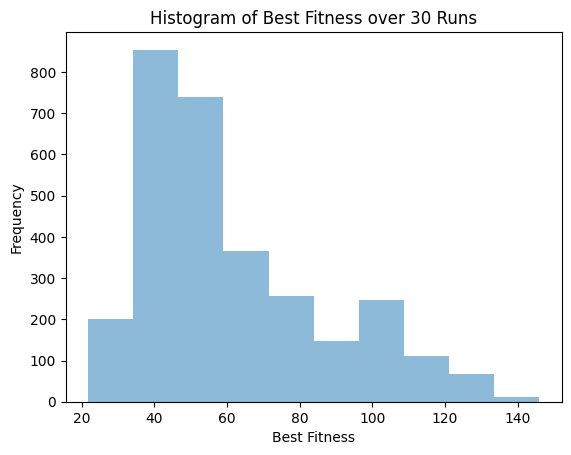

In [11]:
import numpy as np
import matplotlib.pyplot as plt

class DifferentialEvolution:
    def __init__(self, pop_size=100, dimensions=10, min_val=-5.12, max_val=5.12, num_generations=100):
        self.pop_size = pop_size
        self.dimensions = dimensions
        self.min_val = min_val
        self.max_val = max_val
        self.num_generations = num_generations



    
    def rastrigin(self, x):
        """Compute the value of the Rastrigin function for a given vector x."""
        A = 10
        return A * self.dimensions + np.sum(x**2 - A * np.cos(2 * np.pi * x))



    def initialize_population(self):
        
        population = np.zeros((self.pop_size, self.dimensions))
        for i in range(self.dimensions):
            population[:, i] = np.random.uniform(i / self.dimensions, (i + 1) / self.dimensions, self.pop_size)
        population = self.min_val + population * (self.max_val - self.min_val)
        return population



    
    def mutation(self, population):
       
        indices = np.random.choice(len(population), size=3, replace=False)
        mutant_vector = population[indices[0]] + 0.5 * (population[indices[1]] - population[indices[2]])
        return np.clip(mutant_vector, self.min_val, self.max_val)


    
    def crossover(self, target_vector, mutant_vector):
        crossover_mask = np.random.rand(self.dimensions) < 0.9
        return np.where(crossover_mask, mutant_vector, target_vector)


    
    def evolve(self, num_runs=30):
        
        overall_best_solution = None
        overall_best_fitness = float('inf')
        best_fitnesses = []

        for run in range(num_runs):
            population = self.initialize_population()
            best_solution = None
            best_fitness = float('inf')

            for generation in range(self.num_generations):
                for target_idx, target_vector in enumerate(population):
                 
                    mutant_vector = self.mutation(population)

                    
                    trial_vector = self.crossover(target_vector, mutant_vector)

                    trial_fitness = self.rastrigin(trial_vector)
                    target_fitness = self.rastrigin(target_vector)

                    if trial_fitness < target_fitness:
                        population[target_idx] = trial_vector
                        if trial_fitness < best_fitness:
                            best_fitness = trial_fitness
                            best_solution = trial_vector

                if best_fitness < overall_best_fitness:
                    overall_best_fitness = best_fitness
                    overall_best_solution = best_solution

                best_fitnesses.append(best_fitness)
                print(f"Run: {run + 1}, Generation: {generation + 1}, Best Fitness: {best_fitness}")

        return overall_best_solution, overall_best_fitness, best_fitnesses



if __name__ == "__main__":
    de = DifferentialEvolution()
    best_solution, best_fitness, best_fitnesses = de.evolve(num_runs=30)

    print("Overall Best Solution:", best_solution)
    print("Overall Best Fitness:", best_fitness)

    plt.hist(best_fitnesses, bins=10, alpha=0.5)
    plt.xlabel('Best Fitness')
    plt.ylabel('Frequency')
    plt.title('Histogram of Best Fitness over 30 Runs')
    plt.show()
